<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
ass15 = pd.read_csv('../../datasets/san_francisco/san_francisco/assessor_office/assessor_data_2014_2015.csv')
ass14 = pd.read_csv('../../datasets/san_francisco/san_francisco/assessor_office/assessor_data_2013_2014.csv')
# import class codes to sort housing by broad category
class_codes = pd.read_csv('../../datasets/san_francisco/san_francisco/assessor_office/assessor_class_use_key.csv')

# change columns to lowercase so easier to deal with
ass15.columns = map(str.lower, ass15.columns)
class_codes.columns = map(str.lower, class_codes.columns)


Also import class codes dataset.

In [121]:
class_codes.head()

,use,desc,class,desc.1
0,SRES,Single Family Residential,CO,Coop Units Unsegregated
1,SRES,Single Family Residential,COS,Coop Units Segregated
2,SRES,Single Family Residential,D,Dwelling
3,SRES,Single Family Residential,DBM,Dwelling BMR
4,SRES,Single Family Residential,LZ,Live/Work Condominium


In [122]:
# clean class code df
class_codes = class_codes.dropna()
class_codes = class_codes[class_codes.use != 'USE']
# create dictionary of class:use
class_dic = {key:value for key, value in zip(class_codes['class'].values, class_codes['use'].values)}
# make new column in df with broad 'use' category added
ass15['use'] = ass15.rp1clacde.apply(lambda x: class_dic[x] if x in class_dic else np.nan)
ass15.head()

,proploc,rp1nbrcde,rp1prclid,baselot,baselotsfx,rp1volume,rp1clacde,yrblt,baths,beds,...,rp1stacde,rp1exmvl2,rp1exmvl1,rollyear,recurrsald,rp1fxtval,rp1impval,rp1lndval,rp1pptval,use
0,0000 0000 0000,08H,0001 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,COMM
1,0000 0000 0000,08H,0002 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,COMM
2,0000 0000 0000,08H,0004 002,0,NaN,1,VCI,0,0,0,...,N,0,0,14,0,0,0,0,0,NaN
3,0000 0000 0000,08H,0005 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,COMM
4,0000 0000 0000,08H,0006 001,0,NaN,1,G,1900,0,0,...,N,0,0,14,0,0,0,0,0,COMM


In [123]:
sing_fam = ass15[ass15.use == 'SRES']
# drop houses with over 30000 sqft
sing_fam = sing_fam[sing_fam.sqft < 30000]
# drop houses with over 50 baths
sing_fam = sing_fam[sing_fam.baths < 30]
# drop houses with over 50 beds
sing_fam = sing_fam[sing_fam.beds < 50]
# drop houses with lot area over
sing_fam = sing_fam[sing_fam.larea < 50000]
# drop houses with over 50
sing_fam = sing_fam[sing_fam.rooms < 50]
sing_fam = sing_fam[sing_fam.rooms > 0]
# drop houses with over 50
sing_fam = sing_fam[sing_fam.rp1lndval > 100000]
# sing_fam.rp1lndval.value_counts()[:15]

In [124]:
# drop zeros in all 
sing_fam = sing_fam[sing_fam.rp1lndval != 0]
sing_fam = sing_fam[sing_fam.larea > 0]
sing_fam.shape

(63943, 42)

Make some plots of the distributions...

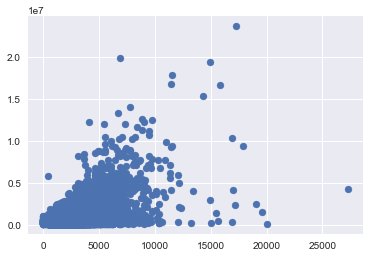

In [125]:
plt.scatter(sing_fam.sqft.values, sing_fam.rp1lndval.values);

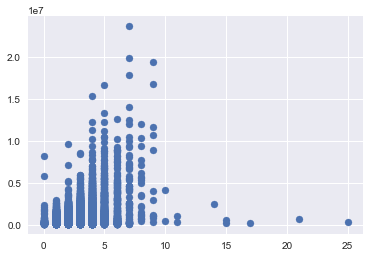

In [126]:
plt.scatter(sing_fam.baths.values, sing_fam.rp1lndval.values);

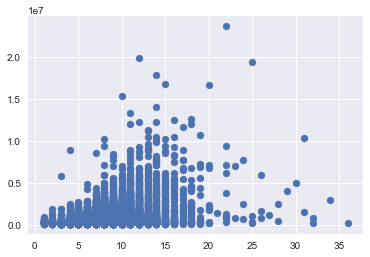

In [127]:
plt.scatter(sing_fam.rooms.values, sing_fam.rp1lndval.values);

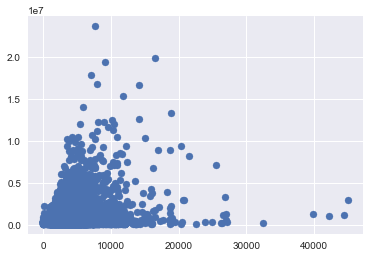

In [128]:
plt.scatter(sing_fam.larea.values, sing_fam.rp1lndval.values);

After looking through the data I decided to use a handful of feature to try to predict the value of land in San Francisco. These features include  square foot of property, # of bathrooms, # of bedrooms, # of rooms, and square footage of lot area.

Above, a new dataframe was created with just the single-family homes category, which was then cleaned of outlier valus and zeros of the taget features.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [129]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [130]:
X = sing_fam[['baths', 'beds', 'rooms', 'larea']]
y = sing_fam.rp1lndval.values

ss = StandardScaler()
Xn = ss.fit_transform(X)

lr = LinearRegression()
model = lr.fit(Xn, y)
predictions = model.predict(Xn)
cv_score = cross_val_score(model, Xn, y, cv=10)
print model.coef_
print model.score(Xn, y)
print cv_score
print np.mean(cv_score)

[ 120037.91869129   16467.81720266   98973.16080342   91174.89897718]
0.199063094991
[-0.10623867 -0.53505293 -0.7574329  -1.07369089 -0.01940066  0.11569346
 -0.84194261 -3.25506622 -0.19328956 -0.87912591]
-0.754554687047


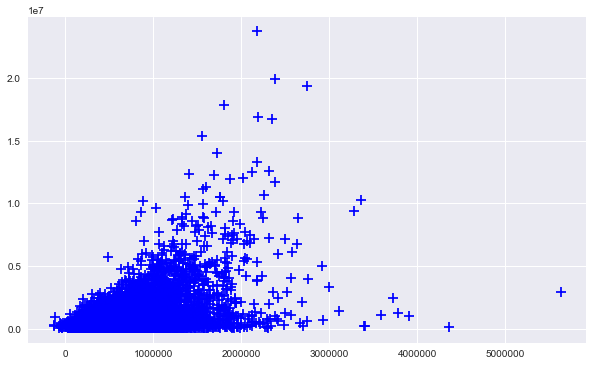

In [131]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+');


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
cross_val_score(lr, Xn, y, cv=5)

ridge_alphas = np.logspace(0, 7, 100)

optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(Xn, y)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xn, y)

print optimal_lasso.alpha_
print optimal_ridge.alpha_

225.534775441
170735.264747


In [133]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)

ridge_scores = cross_val_score(ridge, Xn, y, cv=10)
lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

print 'Ridge scores and mean:'
print ridge_scores
print np.mean(ridge_scores)
print 'Lasso scores and mean:'
print lasso_scores
print np.mean(lasso_scores)

Ridge scores and mean:
[-0.21136841 -0.07535005 -0.28663986 -0.35839135  0.10504352  0.17469563
 -0.52102881 -2.29739906  0.06428703 -0.29495873]
-0.370111010322
Lasso scores and mean:
[-0.10679994 -0.53358477 -0.75582232 -1.0714849  -0.01883324  0.11615672
 -0.84059608 -3.25165145 -0.1924038  -0.87705502]
-0.75320747991


In [134]:
lasso.fit(Xn, y)
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,abs_coef,coef,variable
0,119999.912467,119999.912467,baths
2,98906.149183,98906.149183,rooms
3,90990.013256,90990.013256,larea
1,16311.055839,16311.055839,beds


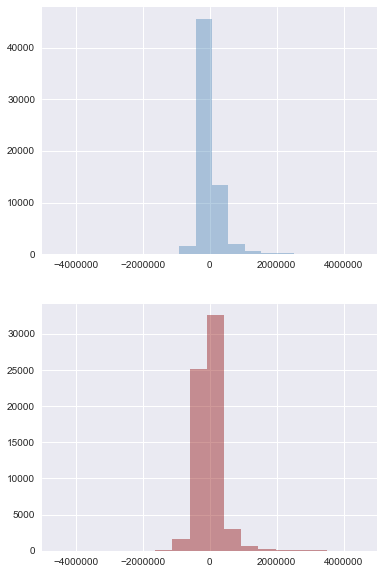

In [135]:
ridge.fit(Xn, y)
lasso.fit(Xn, y)

ridge_resid = y - ridge.predict(Xn)
lasso_resid = y - lasso.predict(Xn)

fig, axarr = plt.subplots(2, 1, figsize=(6, 10))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')
sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')
axarr[0].set_xlim(-0.5e7,0.5e7)
axarr[1].set_xlim(-0.5e7,0.5e7)
plt.show()

It is difficult to draw Linear Regression predictions from this dataset. There are many classes that could Logistically Regressed, but it appears difficult to predict home prices from the square foot of property, # of bathrooms, # of bedrooms, # of rooms, and square footage of lot area.

The dataset was normalized, but that did not help. Using ridge and lasso regression with cross validation yielded negative scores for the (Pearson's) R-squared value. The vanilla linear regression model yielded a R-squared score of ~0.2, which is not good to begin with.

It appears that with vanilla linear regression, a least-squares line can (very) poorly predict data. When regularization and cross validation are used, score are negative because the model is arbitrarily worse.

All of this poor modeling is likely due to the features being poor indications of house price. San Francisco is a diverse housing market with many different factors going into the evaluation of house price. A 1-bedroom in Pacific Heights could cost ten times more than one in the Tenderloin even with the same feature values. This is likely limiting the predictive use of these features.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

There are many negative $R^2$ values after cross validation. Cross validation tests a model by training and testing on different portions of a dataset. Cross validation generates its $R^2$ values from a $(1 - V)$ equation where $V$, representing the sum of predicted errors divided by the sum of squares (using the mean), can be greater than 1 if the predicted values are larger than then the mean. Meaning (pun intended) that when scores are negative for a cross-validation model, the model is worse than predicting the mean for every unknown.

The mean squared error (MSE) for a linear regression fit is simply the sum of all $(y_i - \hat{y})^2$, so it is impossible for it to be negative even with terrible estimtions.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [136]:
fires = pd.read_csv('../../datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv')
crimes = pd.read_csv('../../datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv')
# import class codes to sort housing by broad category
# class_codes = pd.read_csv('../../datasets/san_francisco/san_francisco/assessor_office/assessor_class_use_key.csv')


Predicting the number of fire incidents for a give day of the year, month, or day would help the SF fire deptarment have enough people ready to answer every call. Althought many of the features available are the result of fir incidents...so it is hard to imagine them being able to predict the number of fire incidents.

Importing the crime datset and using (basically) the only valueable feature from it by creating a count of incidents per day using .groupy().

In [138]:
crimes.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000


In [139]:
crimes_date_cnt = crimes.groupby('Date')[['IncidntNum']].count()
crimes_date_cnt.reset_index(inplace=True)
crimes_date_cnt.rename(columns={"Date": "incident_date"}, inplace=True)

Back to the fire incident dataset - clean dataframe and then group two new dataframes, one with incidents per day and another with the sum of features per every day. Remerge the dataframes on the incident dates.

In [140]:
# change columns to lowercase so easier to deal with
fires.columns = map(str.lower, fires.columns)
fires.columns = map(lambda x: x.replace(' ', r'_'), fires.columns)
# class_codes.columns = map(str.lower, class_codes.columns)
fires.head(2).T

,0,1
incident_number,9030109,13067402
exposure_number,0,0
address,310 Colon Av.,20 Lansdale Av
incident_date,04/12/2009,07/18/2013
call_number,91020273,131990117
alarm_dttm,04/12/2009 06:09:13 PM,07/18/2013 10:32:03 AM
arrival_dttm,04/12/2009 06:13:45 PM,07/18/2013 10:37:15 AM
close_dttm,04/12/2009 07:23:13 PM,07/18/2013 10:39:55 AM
city,SF,SF
zipcode,NaN,NaN


In [141]:
fire_feats = ['other_personnel','other_units','ems_personnel','ems_units','suppression_units', 
              'suppression_personnel','station_area']

In [142]:
fire_date_inc = fires.groupby('incident_date')[['incident_number']].count()
fire_date_inc.reset_index(inplace=True)
fire_date_sums = fires.groupby('incident_date')[fire_feats].sum()
fire_date_sums.reset_index(inplace=True)
fire_date = pd.merge(fire_date_inc, fire_date_sums, on='incident_date')
fire_date.head()

,incident_date,incident_number,other_personnel,other_units,ems_personnel,ems_units,suppression_units,suppression_personnel
0,01/01/2003,143,0,0,13,6,362,1172
1,01/01/2004,149,12,6,21,11,344,1318
2,01/01/2005,95,0,0,23,13,256,923
3,01/01/2006,96,0,0,6,3,231,841
4,01/01/2007,131,5,3,41,21,300,1087


Merge the fire and crime datasets on the incident dates (which happen to be the same range and length). This adds the crime incidents per day to the fire incident dataset. Stil not too many features...

In [149]:
f_c_date = pd.merge(fire_date, crimes_date_cnt, on='incident_date')
f_c_date.head()


,incident_date,incident_number,other_personnel,other_units,ems_personnel,ems_units,suppression_units,suppression_personnel,IncidntNum
0,01/01/2003,143,0,0,13,6,362,1172,622
1,01/01/2004,149,12,6,21,11,344,1318,459
2,01/01/2005,95,0,0,23,13,256,923,546
3,01/01/2006,96,0,0,6,3,231,841,621
4,01/01/2007,131,5,3,41,21,300,1087,538


In [150]:
f_c_date.rename(columns={"incident_number": "num_fire_incids", 
                        "IncidntNum": "num_crime_incids"}, inplace=True)
f_c_date.incident_date = pd.to_datetime(f_c_date.incident_date)
f_c_date['doy'] = f_c_date.incident_date.apply(lambda x: x.dayofyear)
f_c_date['dow'] = f_c_date.incident_date.apply(lambda x: x.dayofweek)
f_c_date.head(2)

,incident_date,num_fire_incids,other_personnel,other_units,ems_personnel,ems_units,suppression_units,suppression_personnel,num_crime_incids,doy,dow
0,2003-01-01,143,0,0,13,6,362,1172,622,1,2
1,2004-01-01,149,12,6,21,11,344,1318,459,1,3


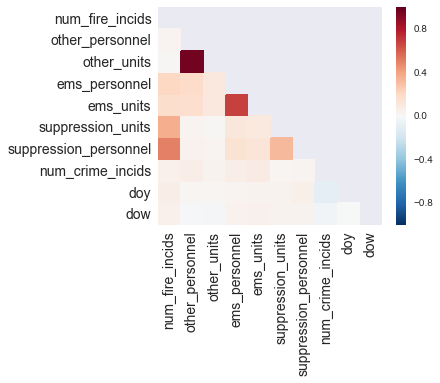

In [151]:
f_c_date_corr = f_c_date.corr()
plt.rcParams['figure.figsize']=(5,4)

# Generate heat map of variable correlations
mask = np.zeros_like(f_c_date_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(f_c_date_corr, mask=mask)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

In [152]:
f_c_doy = f_c_date.groupby('doy').sum()
f_c_doy.reset_index(inplace=True)
f_c_dow = f_c_date.groupby('dow').sum()
f_c_dow.reset_index(inplace=True)

f_c_dow.shape

(7, 10)

I realize that I should deal with leap year days, but the below categorization of total incidents for every weekday shows that there are far more incidents on Fridays and Saturdays, therefore emergency personnely short be staffed in their highest number on the weekend nights - although the police and fire departments are probable aware of this already...

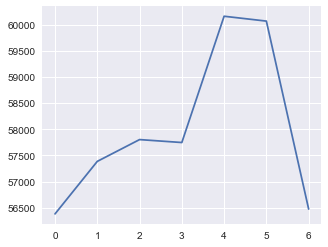

In [153]:
plt.plot(f_c_dow.num_fire_incids);

Linear regression of dataset - fire incedent predictionusing the other features in the merged dataset.

In [148]:
cols = ['other_personnel','other_units','ems_personnel','ems_units',
        'suppression_units','suppression_personnel','num_crime_incids',
        'doy','dow']

y = f_c_date.num_fire_incids.values
X = f_c_date[cols].values

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [34]:
lr = LinearRegression()
model = lr.fit(Xn, y)
predictions = model.predict(Xn)
cv_score = cross_val_score(model, Xn, y, cv=10)
print model.coef_
print model.score(Xn, y)
print cv_score
print np.mean(cv_score)

[-2.56786935  2.2005054   1.78913279  0.54787504  3.56397274  6.89313565
  0.57946981  0.60766233  0.37052885]
0.31766931547
[ 0.23077548  0.20137306  0.2187116   0.39046846  0.31208181  0.26281473
 -0.31502709  0.20848735 -0.27609293  0.38540545]
0.161899791943


The mean linear regression fit does the best job, even compared to the cross-validation prediction errors below.

In [35]:
ridge_alphas = np.logspace(0, 7, 100)

optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(Xn, y)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xn, y)

optimal_enet = ElasticNetCV(n_alphas=500, cv=10)
optimal_enet.fit(Xn, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)
ridge = Ridge(alpha=optimal_ridge.alpha_)
enet = ElasticNet(alpha=optimal_enet.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)
ridge_scores = cross_val_score(ridge, Xn, y, cv=10)
enet_scores = cross_val_score(enet, Xn, y, cv=10)

print 'Lasso scores and mean:'
print lasso_scores
print np.mean(lasso_scores)
print 'Ridge scores and mean:'
print ridge_scores
print np.mean(ridge_scores)
print 'ElasticNet scores and mean:'
print enet_scores
print np.mean(enet_scores)


Lasso scores and mean:
[ 0.25202634  0.22092039  0.2076899   0.35095128  0.28601987  0.27452478
 -0.11727047  0.20245976  0.37852116  0.35533004]
0.241117303244
Ridge scores and mean:
[ 0.20797933  0.21837801  0.24177701  0.35372005  0.30367439  0.26734284
 -0.05781205  0.24219713  0.39610794  0.33917644]
0.251254109272
ElasticNet scores and mean:
[ 0.22082338  0.21416658  0.23360416  0.36274981  0.30385473  0.27143144
 -0.11698414  0.23337882  0.40419923  0.35523069]
0.248245470272


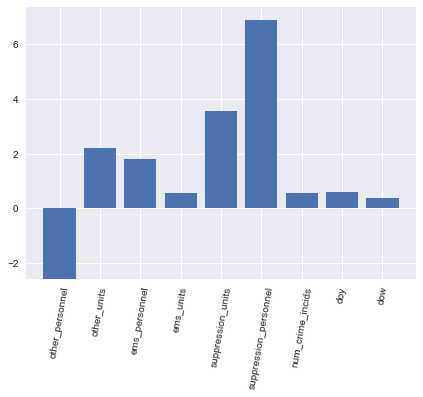

In [36]:
plt.figure(figsize=(7,5))
plt.bar(range(1,len(lr.coef_)+1), lr.coef_)
plt.xticks(range(1,len(lr.coef_)+1), cols, rotation=80);

It appears that the day of the year and the day of the week are not good predictors of fire incidents. The best predictors are those that are the reult of fire incidents, such as 'suppression_personnel' and 'suppression_units'.

The vanilla linear regression model seems to be the best model at predicting the number of fire incidents given the specified set of predicors.

...

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


Loading many datsets, some of which may not be used in the analysis...

In [37]:
cond_ass = pd.read_csv('../../datasets/san_francisco/san_francisco/rec_cond_ass.csv')
budg = pd.read_csv('../../datasets/san_francisco/san_francisco/city_budget/budget.csv')
parks_sc = pd.read_csv('../../datasets/san_francisco/san_francisco/parks/park_scores.csv')
parks_info = pd.read_csv('../../datasets/san_francisco/san_francisco/parks/park_info.csv')
parks_don = pd.read_csv('../../datasets/san_francisco/san_francisco/parks/park_donations.csv')

parks_info = parks_info[1:]
parks_info.columns = map(str.lower, parks_info.columns)
parks_don.columns = map(str.lower, parks_don.columns)
parks_don.columns = map(lambda x: x.replace(' ', r'_'), parks_don.columns)
parks_don.amount = map(lambda x: float(x.replace('$', '')), parks_don.amount)
parks_don.close_date = pd.to_datetime(parks_don.close_date)
parks_sc.head(2)

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957


Initial EDA, using groupby, shows some interesting trends in donations and funding (spending - plot below, for every year).

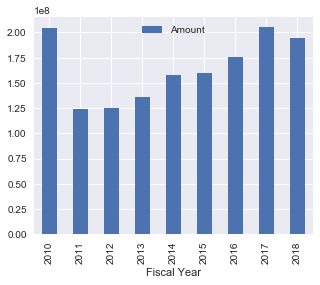

In [38]:
rec_spend = budg[(budg['Department Code'] == 'REC') & (budg['Revenue or Spending'] == 'Spending')]
rec_spend.groupby(['Fiscal Year'])[['Amount']].sum().plot(kind='bar');

In [39]:
parks_don['fq'] = parks_don.close_date.apply(lambda x: 'FY'+ str(x.strftime('%y')) + 'Q' + str((x.month-1)//3))
parks_don['year'] = parks_don.close_date.apply(lambda x: x.year)
parks_don.head(2)

,close_date,account_name,description,amount,type,fq,year
0,2014-07-08,Glen Park Association,To support botanical signs at the Sunnyside Co...,500.0,Cash,FY14Q2,2014
1,2014-07-09,USTA NorCAL,To support HITS tennis programming and provide...,2050.0,Cash,FY14Q2,2014


Donations have drastically increased since the beginning of 2014, this may help elevate scores for the parks.

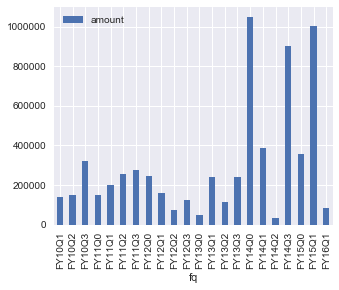

In [154]:
parks_don_quar = parks_don.groupby(['fq'])[['amount']].sum()
parks_don_quar.plot(kind='bar');

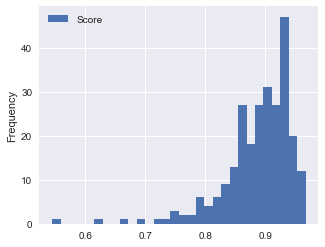

In [41]:
parks_score_PSA = parks_sc.groupby(['PSA','FQ'])[['Score']].mean()
parks_score_quar = parks_sc.groupby(['FQ','PSA'])[['Score']].mean()
parks_score_quar.plot(kind='hist', bins=30);

It seems that, overall, scores for parks are fairly high in San Francisco. However is it hard to use the scores to predict given that the predictors are limited.

In [155]:
rec_budg = budg[budg['Department Code'] == 'REC']
rec_budg.groupby(['Fiscal Year'])[['Amount']].sum()

,Amount
Fiscal Year,
2010,407902830
2011,248253304
2012,250842872
2013,272021906
2014,316488958
2015,320151286
2016,350575060
2017,410384880
2018,388174794


Scour a few features from the 'info' dataset to add to the score dataset. Not too many other sources I could find that could be used to predict park scores besides doing a more elaborate time-series analysis.

In [156]:
parks_info.head(2)

,parkname,parktype,parkservicearea,psamanager,email,number,zipcode,acreage,supdist,parkid,location 1,lat
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN


In [157]:
info_cut = parks_info[['parkid','acreage','supdist']]
info_cut.parkid = info_cut.parkid.values.astype(int)
info_cut.head(2)

,parkid,acreage,supdist
1,156,0.66,1.0
2,185,0.26,7.0


In [158]:
sc_cut = parks_sc.groupby(['ParkID'])[['Score']].mean()
sc_cut.reset_index(inplace=True)
sc_cut.rename(columns={"ParkID": "parkid"}, inplace=True)
sc_cut.head()

,parkid,Score
0,1,0.915485
1,2,1.000000
2,4,0.925576
3,6,0.954545
4,7,0.914758


In [46]:
# inner merge of meager datasets
score_df = pd.merge(info_cut, sc_cut, how='inner', on='parkid')
score_df.head()

,parkid,acreage,supdist,Score
0,156,0.66,1.0,0.910440
1,51,0.12,9.0,0.978033
2,194,0.82,8.0,0.896750
3,46,2.74,10.0,0.807344
4,117,12.70,5.0,0.896548


Linear regression of the merges dataset with scant features...

In [159]:
y = score_df.Score.values
X = score_df[['parkid','acreage','supdist']].values

ss = StandardScaler()
Xn = ss.fit_transform(X)

lr = LinearRegression()
model = lr.fit(Xn, y)
predictions = model.predict(Xn)
cv_score = cross_val_score(model, Xn, y, cv=10)
print model.coef_
print model.score(Xn, y)
print cv_score
print np.mean(cv_score)

[ 0.00390772 -0.0073128  -0.01811658]
0.0594814626268
[-0.07349153  0.08127125  0.05825692 -1.6342851  -0.42682693  0.36793562
 -0.14461814  0.0801458  -0.12595954  0.05327092]
-0.176430073353


In [160]:
ridge_alphas = np.logspace(0, 7, 100)

optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(Xn, y)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xn, y)

optimal_enet = ElasticNetCV(n_alphas=500, cv=10)
optimal_enet.fit(Xn, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)
ridge = Ridge(alpha=optimal_ridge.alpha_)
enet = ElasticNet(alpha=optimal_enet.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)
ridge_scores = cross_val_score(ridge, Xn, y, cv=10)
enet_scores = cross_val_score(enet, Xn, y, cv=10)

print 'Lasso scores and mean:'
print lasso_scores
print np.mean(lasso_scores)
print 'Ridge scores and mean:'
print ridge_scores
print np.mean(ridge_scores)
print 'ElasticNet scores and mean:'
print enet_scores
print np.mean(enet_scores)


Lasso scores and mean:
[-0.06293427  0.09182605  0.0521393   0.20455818 -0.42634782  0.3457042
 -0.12389799  0.07319145 -0.11084532  0.04923214]
0.00926259103059
Ridge scores and mean:
[-0.04425302  0.10263545  0.04377365  0.15800266 -0.41913588  0.31827729
 -0.0846723   0.06067785 -0.08422668  0.04314364]
0.00942226632773
ElasticNet scores and mean:
[-0.06289845  0.09184853  0.05214728  0.20439284 -0.42625294  0.34581699
 -0.12381205  0.07318788 -0.11080428  0.0492343 ]
0.00928600829811


It appears that my analysis is very poor. In the beggining of this section I explained that EDA showed parks have an overall high rating and have increasing amounts of donations flowing into them. There budgets have increased so it is likely that their ratings are will increase in the future. 

The dataset contained many features categorized as strings. It's possible to examine this dataset through time series analysis and try to predict the scores that way, since there seems to be a chronological trend.

Most of the features are categorical so it is difficult to use them for linear regression. With more time maybe I could have generated a better model, alas I must finish this homework assignment...

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


Didn't really have time to manipulate any of the poorly-characterized datasets, above...but felt that I could still answer point 4.

During regularization, a penalty is added to the loss funtion proportional to the size of the betas and a coefficient, $\lambda$ (strength). The optimal regularization $\lambda$ value is found through cross-validating the model and minimizing the cost function through various values of $\lambda$. This is often accomplished with GridSearchCV.

Finding the optimal regularization $\lambda$ allows a model to find the best trade-off between variance and bias. This can also guide the level of model complexity which also attempts to find the perfect balance between variance and bias. 

Of course, all of this means no difference if the dataset is flawed for analysis to begin with, then the high variance and bias will never be improved past a certain point.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


This incentived offer introduces a bias into the dataset by encouraging the creation of ghost accounts which people create to simply obtain a free meal. People may create an alias or make their partner sign up for an account which will never be used. So although the app is increasing the number of users by a large amount, they may not see an increase in order volume. This would throw off (or bias) models that depend heavily on user numbers or distort predictions of future transaction volume.

I would measure the success of the program by seeing if there was an increase in transaction number during the offer that continued or kept increasing after the end of the offer period. It would also be possible to track how many of the accounts established during the offer period continued to use the app - and how many may have stopped using the app after the offer period ended.



An unbiased rephrasing of this question would likely involve a different answer request - "do you agree?" may introduce bias against the framing and supposition integrated into the question. A better question, while maintaining the same response metric, would be:

"Do you agree that their should be restricted access to dangerous weapons?"

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [161]:
hm_data = pd.read_csv('./h_m_ds.txt', sep=' ')
hm_data.columns = map(str.lower, hm_data.columns)
hm_data.head()

,age,height,weight,chol,smoke,blood,mort
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [162]:
# clean stuff, convert columns
## convert two columns to true or false
true = ["sigare","pipe","dead"]
false = ["nonsmo","alive"]
hm_data.replace(to_replace=true, value=1, inplace=True)
hm_data.replace(to_replace=false, value=0, inplace=True)
# ditch blood column
#hm_data = hm_data[[x for x in hm_data.columns if x != "blood"]]
hm_data.head()

,age,height,weight,chol,smoke,blood,mort
0,20,176,77,195,0,b,0
1,53,167,56,250,1,o,1
2,44,170,80,304,1,a,1
3,37,173,89,178,0,o,0
4,26,170,71,206,1,o,0


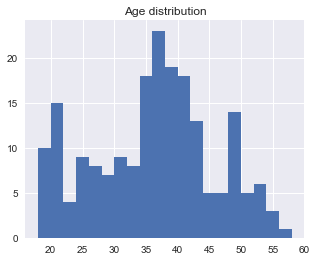

In [163]:
plt.hist(hm_data.age, bins=20)
plt.title('Age distribution');

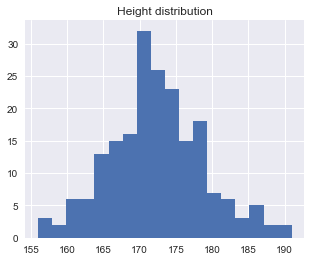

In [164]:
plt.hist(hm_data.height, bins=18)
plt.title('Height distribution');

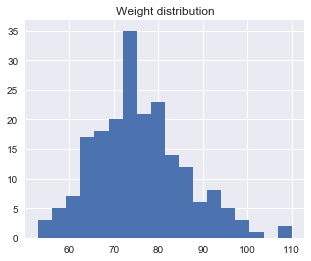

In [165]:
plt.hist(hm_data.weight, bins=18)
plt.title('Weight distribution');

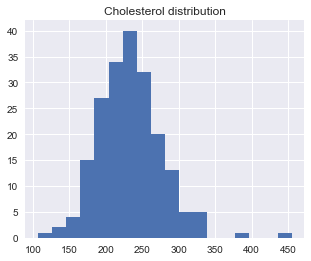

In [166]:
plt.hist(hm_data.chol, bins=18)
plt.title('Cholesterol distribution');

In [167]:
yes = hm_data[hm_data.smoke == 1]
no = hm_data[hm_data.smoke == 0]
smok_mort = yes.mort.sum()/float(len(hm_data.mort))
non_mort = no.mort.sum()/float(len(hm_data.mort))

print 'Compared against the whole population of this small dataset:'
print 'Smoker mortality rate: {}'.format(smok_mort)
print 'Non-smoker mortality rate: {}'.format(non_mort)

Compared against the whole population of this small dataset:
Smoker mortality rate: 0.1
Non-smoker mortality rate: 0.02


The smokers have a higher mortality when compared to the whole population. It would be interesting to see how the cholesterol distributions compare for smokers and non-smokers.

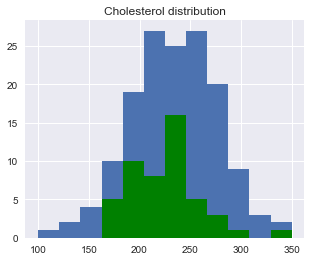

In [168]:
plt.hist(yes.chol, bins=12, range=(100,350))
plt.hist(no.chol, bins=12, range=(100,350), color='g')
plt.title('Cholesterol distribution');

In [169]:
print 'There are far less non smokers and the mean cholesterol of the population is different'
print 'Mean chol. smoker: {}'.format(yes.chol.mean())
print 'Mean chol. non smoker: {}'.format(no.chol.mean())

There are far less non smokers and the mean cholesterol of the population is different
Mean chol. smoker: 236.152317881
Mean chol. non smoker: 225.734693878


### Weight comparisons

Only knowing the mean of the overall total population, we can use a z-test to compare how well the populations overlap.

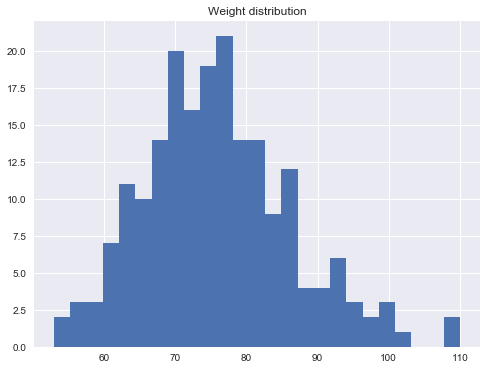

In [170]:
plt.figure(figsize=(8,6))
plt.hist(hm_data.weight, bins=25)
plt.title('Weight distribution');

In [171]:
mean_w = np.mean(hm_data.weight)
std_w = np.std(hm_data.weight)
print 'Mean weight: {}'.format(mean_w)
print 'StDev weight: {}'.format(std_w)

Mean weight: 75.885
StDev weight: 10.4159385079


We can use the above statistics, along with the number of the sample population, to calculate a z-score for this distribution compared to the entire population which has a mean of 85.

In [172]:
# Manual calculation of the z-score
stand_err = std_w/np.sqrt(len(hm_data))
z_score = (mean_w - 85.)/stand_err
print stand_err, z_score

0.736518075135 -12.3757994647


In [173]:
# run a ztest 
from statsmodels.stats.weightstats import ztest

ztest(hm_data.weight.values, value=85., alternative="two-sided")

(-12.344821194685455, 5.1949526167927626e-35)

There are very similar values for the manually calculate z-score and the stats model score. The z-score is very large, meaning that the populations means are more than 12.34 standard deviations away from each other. This is not signficant within a 0.90 confidence interval, and is off of the z-score tables. This means that we can reject the null hypothesis because the sample population has a significantly different distibution than the full population.